# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

# Create the NewsAPI client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

# Read your api key environment variable
type(os.environ["NEWS_API_KEY"])

str

In [3]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(
    q="Bitcoin OR BTC OR bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Test sample article 

bitcoin_articles['articles'][10]

# Print total number of articles

print(f"Total articles about Bitcoin: {bitcoin_articles['totalResults']}")


Total articles about Bitcoin: 9174


In [4]:
# Fetch the Ethereum news articles

ethereum_articles = newsapi.get_everything(
    q="Ethereum OR ETH OR ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Test sample article 

ethereum_articles['articles'][10]

# Print total number of articles

print(f"Total articles about Ethereum: {ethereum_articles['totalResults']}")

Total articles about Ethereum: 2425


In [5]:
# Create the Bitcoin sentiment scores DataFrame

btc_sentiment = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiment)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-02-25T10:00:00Z,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.000,0.754
1,2021-02-12T10:51:25Z,Twitter and Square CEO Jack Dorsey and rapper ...,0.2500,0.056,0.000,0.944
2,2021-02-12T13:00:00Z,When Bitcoin first appeared out of digital thi...,0.1779,0.051,0.032,0.916
3,2021-02-20T15:11:15Z,A day after the leading cryptocurrency rose mo...,0.1027,0.042,0.000,0.958
4,2021-02-20T00:02:58Z,The cryptocurrency bull market has gained sign...,0.3182,0.121,0.058,0.822


In [6]:
# Create the ethereum sentiment scores DataFrame

eth_sentiment = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiment.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiment)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-02-27T13:26:25Z,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909
1,2021-02-18T16:16:57Z,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818
2,2021-02-18T21:06:00Z,"NEW YORK (Reuters) - Ethereum, the second larg...",0.5719,0.139,0.000,0.861
3,2021-02-18T21:00:00Z,"NEW YORK, Feb 18 (Reuters) - Ethereum, the sec...",0.5719,0.135,0.000,0.865
4,2021-03-06T14:00:00Z,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789


In [7]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,95.000000,95.000000,95.000000,95.00000
mean,0.159239,0.062505,0.023526,0.90340
std,0.365183,0.070424,0.052020,0.12707
min,-0.906200,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.85300
50%,0.000000,0.049000,0.000000,0.93000
75%,0.440400,0.092000,0.000000,1.00000
max,0.877900,0.260000,0.326000,1.00000


In [8]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,93.000000,93.000000,93.000000,93.000000
mean,0.158214,0.061462,0.026108,0.912441
std,0.381752,0.063917,0.051720,0.076192
min,-0.910000,0.000000,0.000000,0.701000
25%,0.000000,0.000000,0.000000,0.860000
50%,0.025800,0.054000,0.000000,0.924000
75%,0.493900,0.091000,0.048000,1.000000
max,0.877900,0.246000,0.299000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin .0619 vs. .0632

Q: Which coin had the highest compound score?

A: Bitcoin 95 vs. 93

Q. Which coin had the highest positive score?

A:  Bitcoin 95 vs. 93

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [9]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [10]:
# Expand the default stopwords list if necessary
print(stopwords.words('english'))
sw_addon = {}

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer() 
    lem = [lemmatizer.lemmatize(word) for word in words]

    # Convert the words to lowercase remove stopwords
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens
    



In [12]:
# Create a new tokens column for bitcoin
btc_df['tokens']=[tokenizer(word) for word in btc_df['text']]
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-02-25T10:00:00Z,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.000,0.754,"[tldr, enter, complete, bitcoin, btc, investme..."
1,2021-02-12T10:51:25Z,Twitter and Square CEO Jack Dorsey and rapper ...,0.2500,0.056,0.000,0.944,"[twitter, square, ceo, jack, dorsey, rapper, j..."
2,2021-02-12T13:00:00Z,When Bitcoin first appeared out of digital thi...,0.1779,0.051,0.032,0.916,"[bitcoin, first, appeared, digital, thin, air,..."
3,2021-02-20T15:11:15Z,A day after the leading cryptocurrency rose mo...,0.1027,0.042,0.000,0.958,"[day, leading, cryptocurrency, rose, along, wa..."
4,2021-02-20T00:02:58Z,The cryptocurrency bull market has gained sign...,0.3182,0.121,0.058,0.822,"[cryptocurrency, bull, market, ha, gained, sig..."


In [13]:
# Create a new tokens column for ethereum
eth_df['tokens']=[tokenizer(word) for word in eth_df['text']]
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-02-27T13:26:25Z,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909,"[nfts, nonfungible, token, scarce, digital, co..."
1,2021-02-18T16:16:57Z,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818,"[worried, geforce, rtx, sold, cryptocurrency, ..."
2,2021-02-18T21:06:00Z,"NEW YORK (Reuters) - Ethereum, the second larg...",0.5719,0.139,0.000,0.861,"[new, york, reuters, ethereum, second, largest..."
3,2021-02-18T21:00:00Z,"NEW YORK, Feb 18 (Reuters) - Ethereum, the sec...",0.5719,0.135,0.000,0.865,"[new, york, feb, reuters, ethereum, second, la..."
4,2021-03-06T14:00:00Z,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789,"[nfts, latest, cryptocurrency, rage, day, band..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [14]:
from collections import Counter
from nltk import ngrams

In [15]:
# Generate the Bitcoin N-grams where N=2
btc_all_text = []
for token in btc_df['tokens']:
    for text in token:
        btc_all_text.append(text)
btc_bigram_counter = Counter(ngrams(btc_all_text, n=2))
print(dict(btc_bigram_counter.most_common(10)))

{('char', 'reuters'): 25, ('reuters', 'bitcoin'): 13, ('virtual', 'currency'): 12, ('record', 'high'): 11, ('illustration', 'taken'): 11, ('reuters', 'stafffile'): 10, ('stafffile', 'photo'): 10, ('new', 'record'): 8, ('currency', 'bitcoin'): 7, ('char', 'february'): 6}


In [16]:
# Generate the Ethereum N-grams where N=2
eth_all_text = []
for token in eth_df['tokens']:
    for text in token:
        eth_all_text.append(text)
eth_bigram_counter = Counter(ngrams(eth_all_text, n=2))
print(dict(eth_bigram_counter.most_common(10)))

{('char', 'reuters'): 12, ('record', 'high'): 8, ('nonfungible', 'token'): 6, ('reuters', 'bitcoin'): 6, ('reuters', 'stafffile'): 6, ('stafffile', 'photo'): 6, ('feb', 'reuters'): 5, ('cryptocurrency', 'exchange'): 5, ('char', 'bitcoin'): 5, ('alltime', 'high'): 5}


In [17]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [18]:
# Get the top 10 words for Bitcoin
token_count(btc_all_text)

[('char', 91),
 ('bitcoin', 67),
 ('reuters', 45),
 ('ha', 24),
 ('high', 17),
 ('photo', 17),
 ('currency', 16),
 ('cryptocurrency', 15),
 ('market', 15),
 ('record', 15)]

In [19]:
# Get the top 10 words for Ethereum
token_count(eth_all_text)


[('char', 93),
 ('bitcoin', 34),
 ('reuters', 30),
 ('new', 25),
 ('cryptocurrency', 22),
 ('ethereum', 19),
 ('ha', 15),
 ('high', 15),
 ('day', 12),
 ('token', 11)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

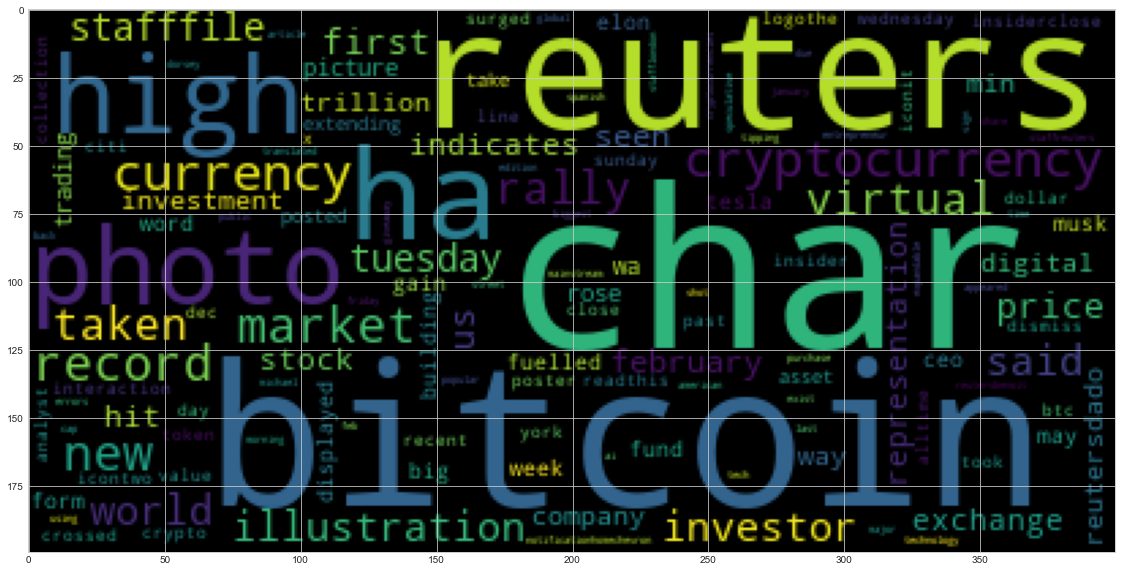

In [21]:
# Generate the Bitcoin word cloud
def processed_text(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    return big_string


# Generate btc  words
btc_words = processed_text(btc_all_text)

# Bitcoin word cloud
btc_wc = WordCloud(collocations=False).generate(btc_words)
fig = plt.figure()
plt.imshow(btc_wc)
plt.show()

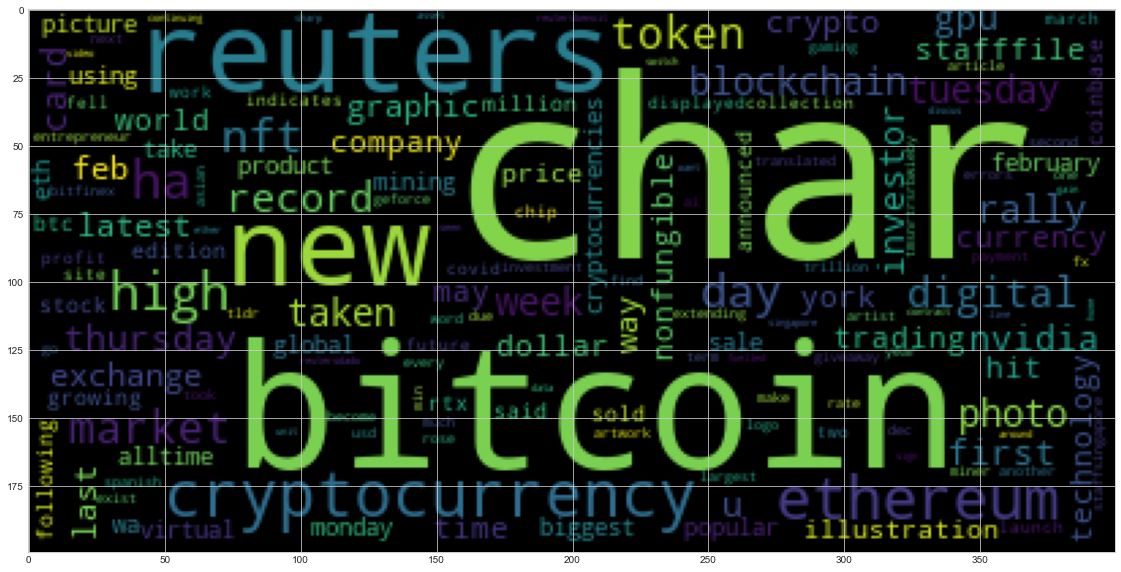

In [22]:
# Generate the Ethereum word cloud
eth_words = processed_text(eth_all_text)
eth_wc = WordCloud(collocations=False).generate(eth_words)
fig = plt.figure()
plt.imshow(eth_wc)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [23]:
import spacy
from spacy import displacy

In [24]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [25]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [27]:
# Concatenate all of the bitcoin text together

btc_text = []

for text in btc_df['text']:
    text = text
    btc_text.append(text)
    
big_string_btc = ' '.join(btc_text)

In [28]:
# Run the NER processor on all of the text
btc_doc = nlp(big_string_btc)

# Add a title to the document
btc_doc.user_data['title'] = 'Bitcoin NER'

In [29]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [33]:
# List all Entities
# YOUR CODE HERE!

Binance PERSON
Binance GPE
around $8,130 MONEY
60.84 percent PERCENT
the past month DATE
3,086.14 MONEY
the latter half of 2017 DATE
$40 million MONEY
Bitcoin GPE
Flexa ORG
today DATE
GameStop ORG
Nordstrom NORP
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
$15 million MONEY
Europol PERSON
three CARDINAL
second ORDINAL
more than €550,000 MONEY
around $615,000 MONEY
last week DATE
’m PERSON
May 7 DATE
about 10,000 CARDINAL
Baltimore GPE
RobbinHood ORG
13 CARDINAL
76,280 MONEY
today DATE
102,310 MONEY
Binance PERSON
last week's DATE
7,000 CARDINAL
roughly $40 million MONEY
Monday DATE
Binance GPE
one CARDINAL
about 7,000 CARDINAL
around $40 million MONEY
Bloomb PERSON
Tether PERSON
New Yorks GPE
month DATE
California GPE
Maine GPE
New York GPE
Albany GPE
Peter da Silva PERSON
the National Academy of Sciencies ORG
1965 DATE
Bitcoin BTC ORG
Tether ORG
Bitcoin GPE
Bitcoin GPE
the Wall Street Market FAC
European NORP
U.S. GPE
Millions 

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!

'President Trump tweeted insults at Twitter again this morning, but this time Jack took the conversation off platform to the White House. In other news, a controversial Census question creates some strange bedfellows, and a "blockchain bandit" is pilfering mil… [+1705 chars]After announcing that they were launching a managed blockchain service late last year, Amazon Web Services is now opening that service up for general availability.\r\nIt was only about five months ago that AWS chief executive Andy Jassy announced that the compa… [+1220 chars]Captain Kirk and neo-Dadaists. Repugnant markets and legendary cryptographers. “Digital couture” auctioned by CryptoKitties developers. Distributed autonomous art organizations. A keynote speech looking back from 2047 at the near-apocalypse of 2026, from whic… [+5265 chars]So long as cryptocurrency exists, so too will the extraordinarylengths to which thieves will go to try to steal it. Unfortunately, that also includes preying on weak private k

In [35]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [36]:
# Render the visualization
# YOUR CODE HERE!

In [37]:
# List all Entities
# YOUR CODE HERE!

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f